# 범죄 총건수 및 유형별 분석기점 선정  

## 1. 연도별 범죄 총 건수 시각화

In [2]:
import csv

In [3]:
import pandas as pd


# Step 1: Read the CSV files
df2 = pd.read_csv('../Data/범죄발생및검거현황/범죄발생_검거현황(11~22).csv')
df1 = pd.read_csv('../Data//범죄발생및검거현황/범죄발생_검거현황(94~10).csv')
df1.drop(columns=['죄종별(1)'], inplace=True)
df2.drop(columns=['죄종별(1)'], inplace=True)

In [4]:
df1.columns=['연도','범죄 총 건수', '검거율', '검거인원', '남(검거수)', '여(검거수)']
df2.columns=['연도','범죄 총 건수', '검거율', '검거인원', '남(검거수)', '여(검거수)']

In [5]:
df1, df2

(      연도  범죄 총 건수   검거율     검거인원   남(검거수)  여(검거수)
 0   1994  1309326  90.4  1423618  1240591  183027
 1   1995  1329694  90.4  1450159  1250532  199627
 2   1996  1419811  90.7  1551400  1325056  226344
 3   1997  1536652  91.0  1672355  1440974  231381
 4   1998  1712233  92.3  1862996  1574056  288940
 5   1999  1654064  95.2  1926158  1612592  313566
 6   2000  1739558  88.7  1897415  1606484  290931
 7   2001  1860687  88.3  1980174  1668456  311718
 8   2002  1833271  92.4  1942987  1631803  311184
 9   2003  1894762  88.6  1917210  1596351  320859
 10  2004  1968183  89.5  2267904  1867190  400714
 11  2005  1733122  87.3  1969826  1640981  328845
 12  2006  1719075  86.3  1992777  1663935  328842
 13  2007  1836496  87.9  2109545  1767114  342431
 14  2008  2063737  87.8  2333120  1951565  381555
 15  2009  2020209  89.7  2333715  1927584  406131
 16  2010  1784953  84.8  1986319  1646357  339962,
       연도  범죄 총 건수   검거율     검거인원   남(검거수)  여(검거수)
 0   2011  1752598  78.9  1902

C:\Users\jeaji\AppData\Local\Temp\ipykernel_21172\155166712.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_for_plot['퍼센트변화'] = total_for_plot['범죄 총 건수'].pct_change() * 100


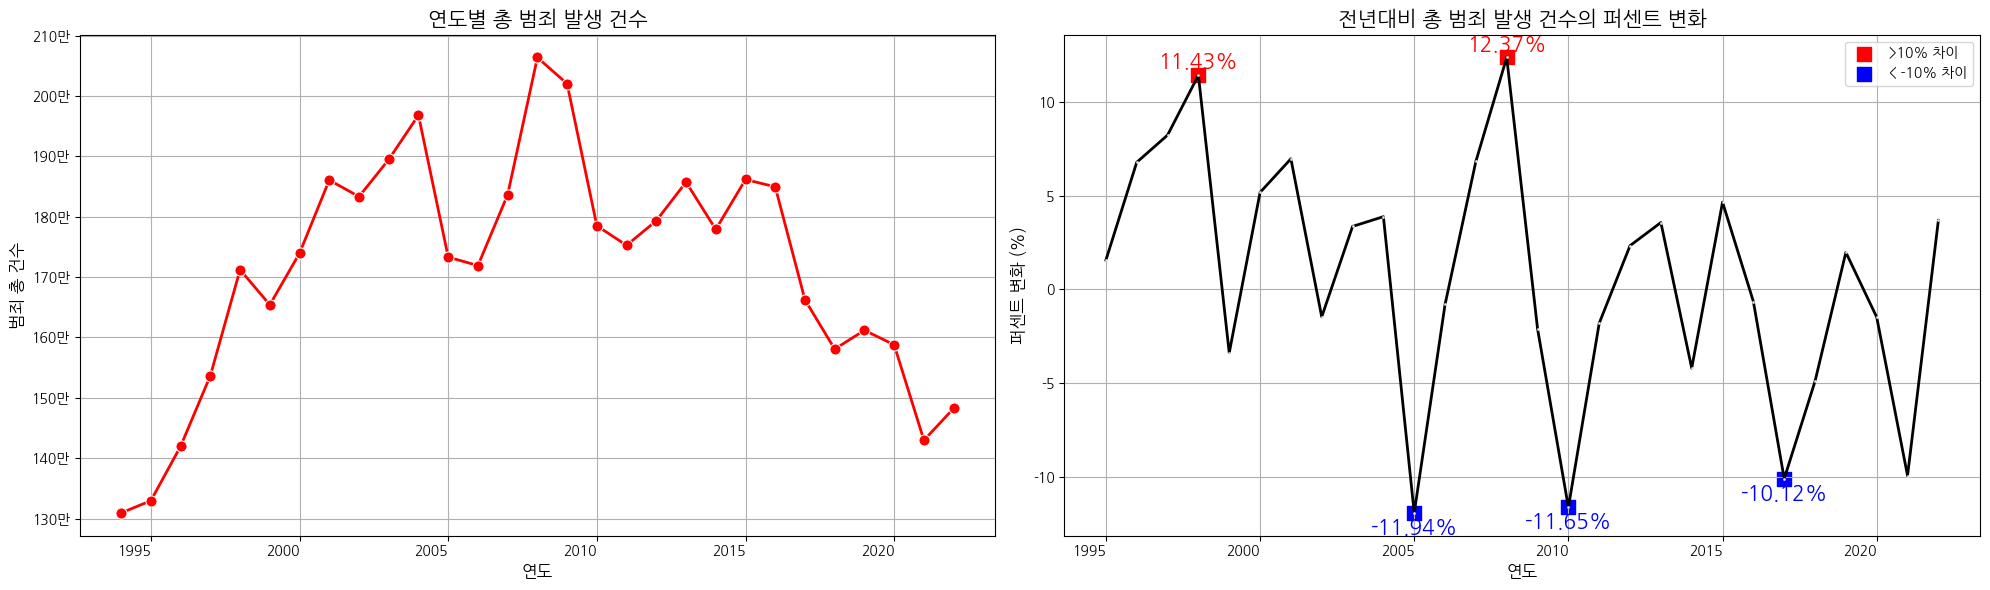

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib.ticker import FuncFormatter

# 94년도 데이터 계산을 위한 93년 데이터 추가
total = pd.concat([df1, df2])
new_row = pd.DataFrame({'연도': ['1993'], '범죄 총 건수': [1304349]})
total = pd.concat([new_row, total]).reset_index(drop=True)

total['범죄 총 건수'] = pd.to_numeric(total['범죄 총 건수'], errors='coerce')

total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산

total_for_plot = total[total['연도'] != '1993']
total_for_plot['퍼센트변화'] = total_for_plot['범죄 총 건수'].pct_change() * 100

threshold_10 = 10

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
formatter = FuncFormatter(lambda x, pos: "{:,.0f}".format(x//10000) + "만")

sns.lineplot(x='연도', y='범죄 총 건수', data=total_for_plot, marker='o', markersize=8, color='r', linewidth=2, ax=ax[0])
ax[0].set_title('연도별 총 범죄 발생 건수', fontsize=15)
ax[0].set_xlabel('연도', fontsize=12)
ax[0].set_ylabel('범죄 총 건수', fontsize=12)
ax[0].yaxis.set_major_formatter(formatter)

sns.lineplot(x='연도', y='퍼센트변화', data=total_for_plot, marker='s', markersize=1, color='black', linewidth=2, ax=ax[1])
ax[1].set_title('전년대비 총 범죄 발생 건수의 퍼센트 변화', fontsize=15)
ax[1].set_xlabel('연도', fontsize=12)
ax[1].set_ylabel('퍼센트 변화 (%)', fontsize=12)

diff_points_10_positive = total_for_plot[total_for_plot['퍼센트변화'] > threshold_10]
ax[1].scatter(x=diff_points_10_positive['연도'], y=diff_points_10_positive['퍼센트변화'], color='red', s=100, marker='s', label=f'>{threshold_10}% 차이')

diff_points_10_negative = total_for_plot[total_for_plot['퍼센트변화'] < -threshold_10]
ax[1].scatter(x=diff_points_10_negative['연도'], y=diff_points_10_negative['퍼센트변화'], color='b', s=100, marker='s', label=f'< -{threshold_10}% 차이')

# Annotate points
for i, row in diff_points_10_positive.iterrows():
    ax[1].annotate(f"{row['퍼센트변화']:.2f}%", (row['연도'], row['퍼센트변화']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=15, color='r')
for i, row in diff_points_10_negative.iterrows():
    ax[1].annotate(f"{row['퍼센트변화']:.2f}%", (row['연도'], row['퍼센트변화']), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=15, color='b')

plt.setp(ax[0].get_xticklabels(), ha="right", rotation_mode="anchor")
plt.setp(ax[1].get_xticklabels(), ha="right", rotation_mode="anchor")

ax[0].grid(True)
ax[1].grid(True)

ax[1].legend()
plt.tight_layout()

plt.show()


### 분석 기점 선정

1. 전년대비 퍼센트 1998, 2008년에 왜 10%이상이나 증가했는가?
2. 2005, 2010, 2017 -10%이상이나 감소했는가?
* 해당하는 년도 +-1연결해서 분석
--------------------------------------------------

In [ ]:
total_for_plot.info()

## 2. 범죄 유형별 성장률 뽑아내기

### 데이터 정리

In [24]:
import pandas as pd

cate_df2 = pd.read_csv('../Data/범죄발생및검거현황/유형발생건수(11~22).csv')
cate_df1 = pd.read_csv('../Data/범죄발생및검거현황/유형발생건수(94~10).csv')

In [25]:

cate_df1.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']
cate_df1.drop(cate_df1.index[:2], inplace=True)
cate_df1 = cate_df1.reset_index(drop=True)

In [26]:
cate_df2.columns=['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
cate_df2.drop(cate_df2.index[:1], inplace=True)
cate_df2 = cate_df2.reset_index(drop=True)

In [27]:
# 모든 값 정수형으로 변환
numeric_cols_df2 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별경제범', '마약범','보건범','환경범','교통범', '노동범', '안보범', '선거범', '병역범', '기타범']
numeric_cols_df1 = ['연도','강력범', '절도범', '폭력범', '지능범', '풍속범', '특별범법']

cate_df2[numeric_cols_df2] = cate_df2[numeric_cols_df2].astype(int)
cate_df1[numeric_cols_df1] = cate_df1[numeric_cols_df1].astype(int)

In [28]:
total['차이'] = total['범죄 총 건수'].diff()  
total['퍼센트변화'] = total['범죄 총 건수'].pct_change() * 100  # 퍼센트로 계산

### 범죄 94~22년까지의 라인그래프 보여주기 모든 유형

In [29]:
#유의미한 데이터만 추출합니다.
cate10 = cate_df1.iloc[:, :5]
cate22 = cate_df2.iloc[:, :-1]

In [30]:
# cate10 데이터프레임을 와이드 형식에서 롱 형식으로 변환합니다.
alldata10 = cate10.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
alldata22 = cate22.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

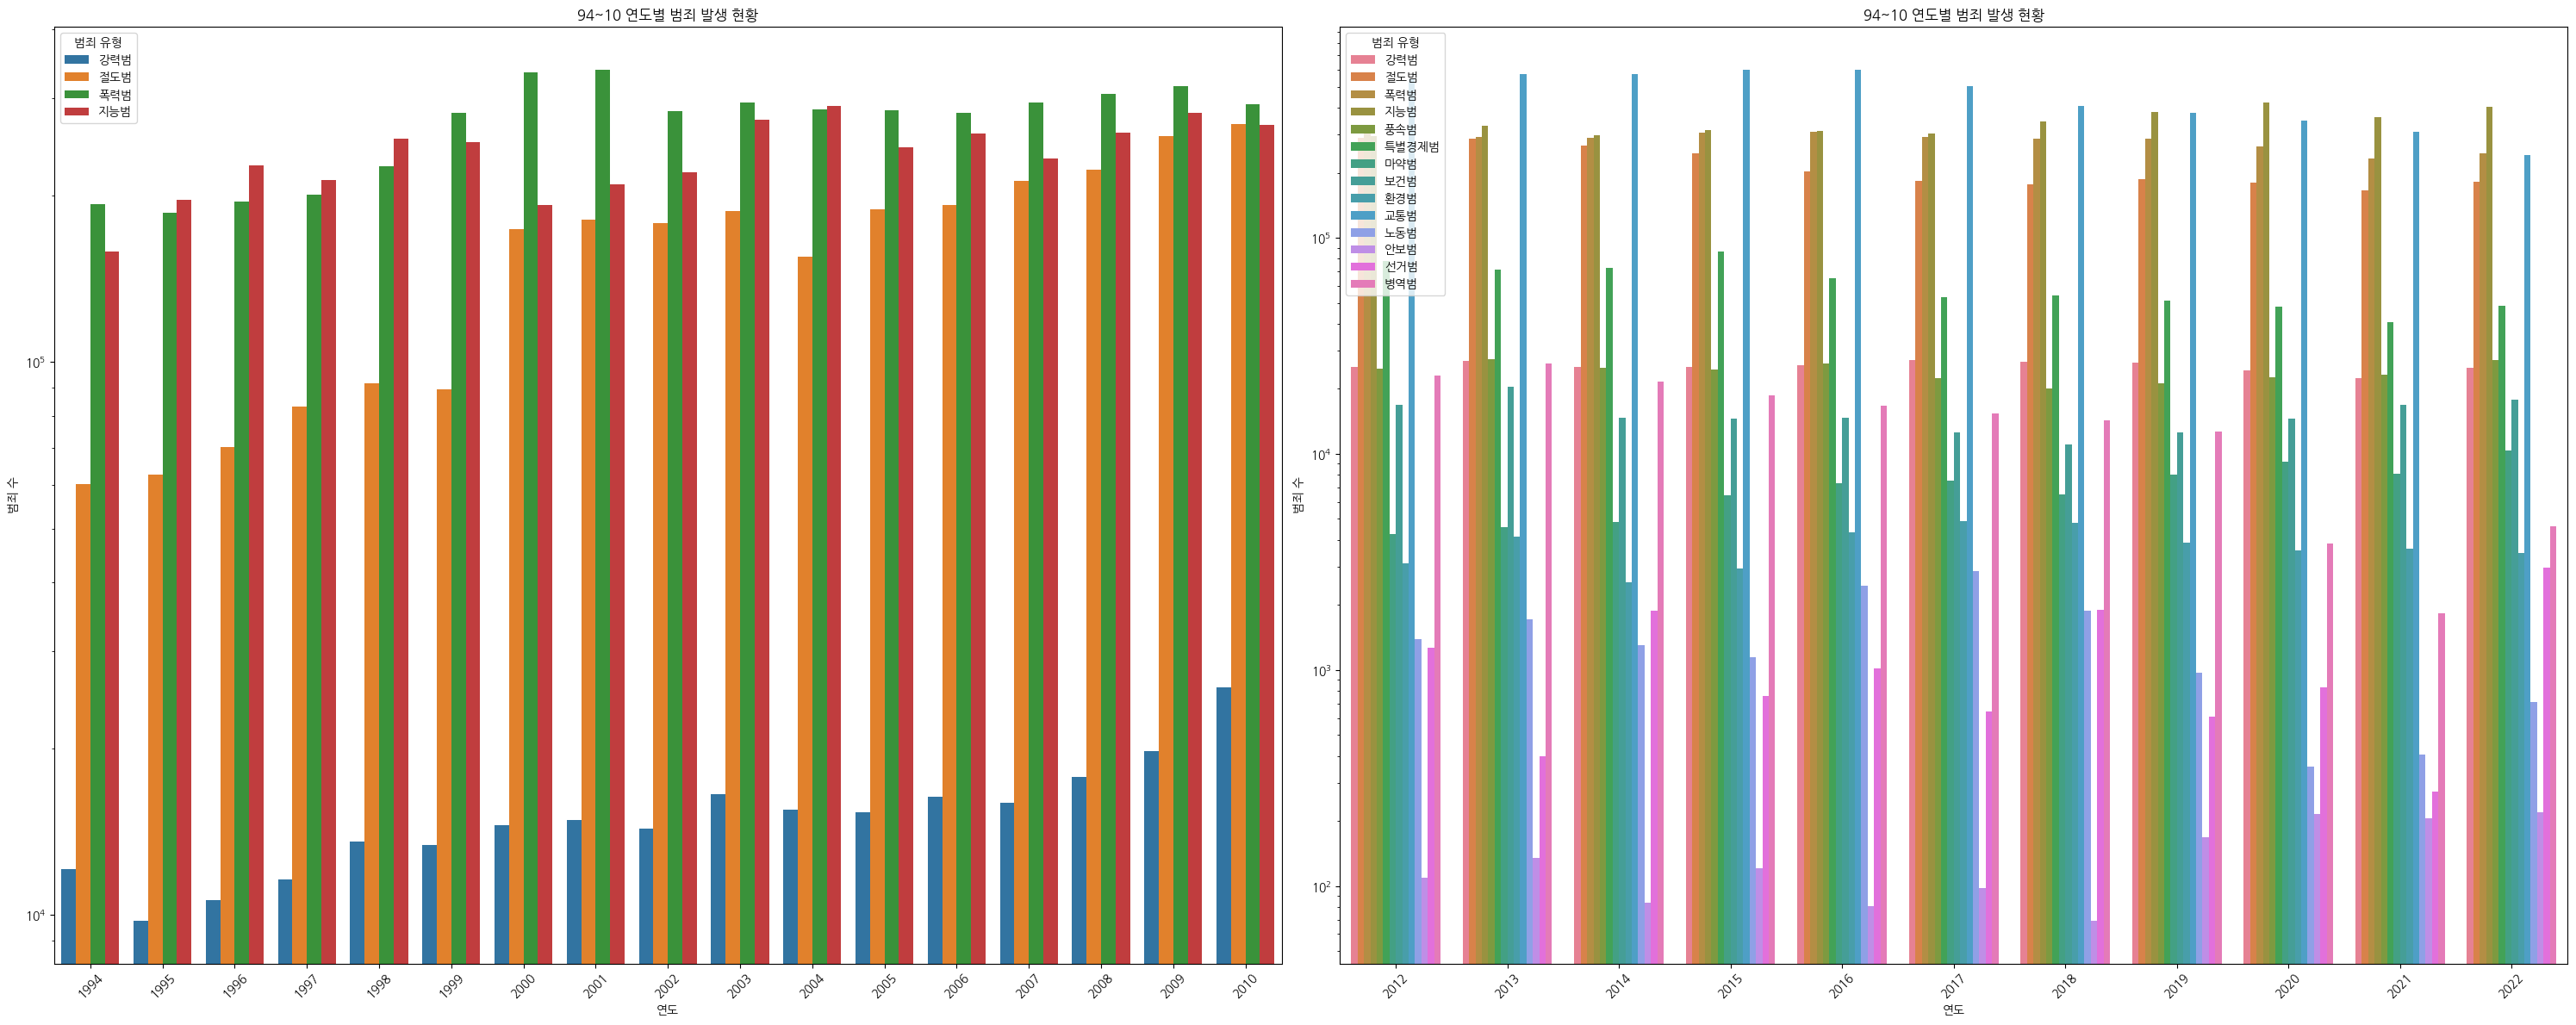

In [35]:
plt.figure(figsize=(30, 12))

plt.subplot(1, 2, 1)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=alldata10)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='범죄 유형', loc='upper left')


plt.subplot(1, 2, 2)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=alldata22)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')
plt.yscale('log')
plt.tight_layout()
plt.show()

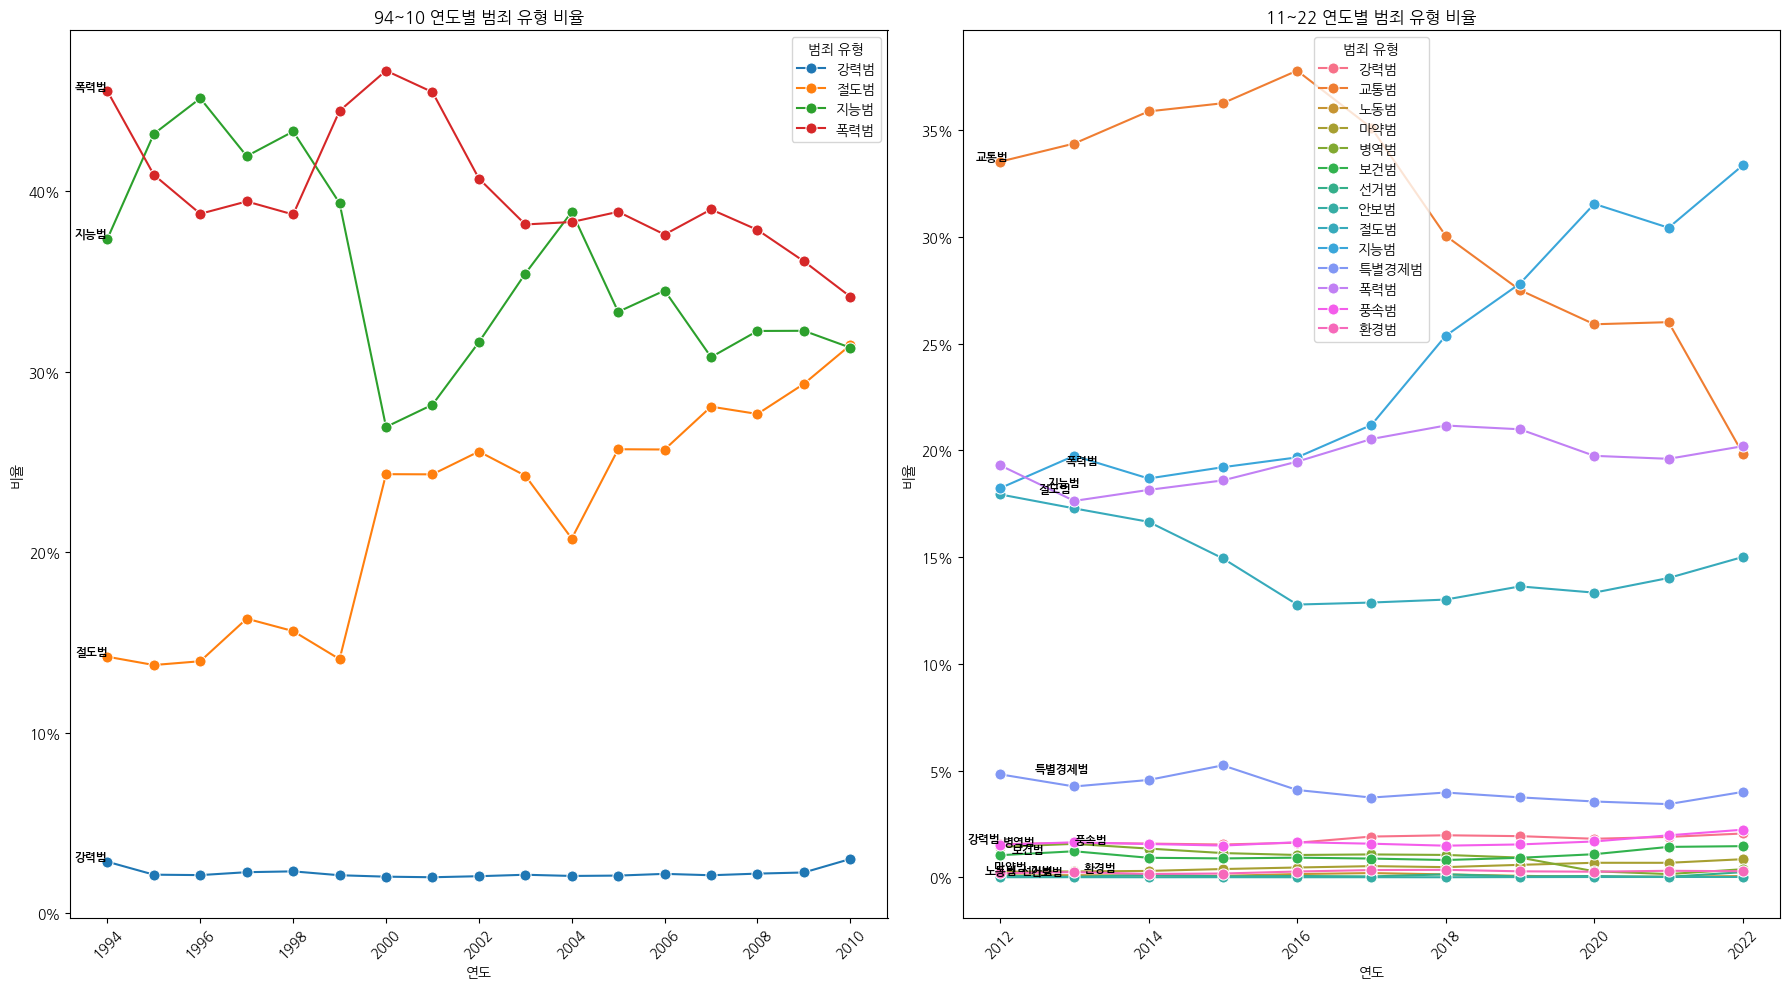

In [62]:
alldata10_proportion = alldata10.groupby(['연도', '범죄 유형'])['범죄 수'].sum().reset_index()
alldata10_proportion['proportion'] = alldata10_proportion['범죄 수'] / alldata10_proportion.groupby('연도')['범죄 수'].transform('sum')

alldata22_proportion = alldata22.groupby(['연도', '범죄 유형'])['범죄 수'].sum().reset_index()
alldata22_proportion['proportion'] = alldata22_proportion['범죄 수'] / alldata22_proportion.groupby('연도')['범죄 수'].transform('sum')

# Plot the proportion
plt.figure(figsize=(18, 10))

ax1 = plt.subplot(1, 2, 1)
sns.lineplot(x='연도', y='proportion', hue='범죄 유형', data=alldata10_proportion, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('94~10 연도별 범죄 유형 비율')
plt.xticks(rotation=45)
ax1.yaxis.set_major_formatter(formatter)
# plt.yscale('log')
for crime_type in alldata10_proportion['범죄 유형'].unique():
    subset = alldata10_proportion[alldata10_proportion['범죄 유형'] == crime_type]
    start_year = subset['연도'].min()
    start_value = subset[subset['연도'] == start_year]['proportion'].values[0]
    ax1.text(start_year, start_value, crime_type, horizontalalignment='right', size='small', color='black', weight='semibold',
             verticalalignment='bottom')


formatter = FuncFormatter(lambda x, pos: "{:,.0f}".format(x*100) + "%")

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x='연도', y='proportion', hue='범죄 유형', data=alldata22_proportion, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('비율')
plt.title('11~22 연도별 범죄 유형 비율')
plt.xticks(rotation=45)
ax2.yaxis.set_major_formatter(formatter)
# plt.yscale('log')

cnt = 0
for crime_type in alldata22_proportion['범죄 유형'].unique():
    subset = alldata22_proportion[alldata22_proportion['범죄 유형'] == crime_type]
    start_year = subset['연도'].min()
    start_value = subset[subset['연도'] == start_year]['proportion'].values[0]
    ax2.text(start_year + cnt, start_value, crime_type, horizontalalignment='right', size='small', color='black', weight='semibold',
             verticalalignment='bottom')
            
    cnt+=0.12

plt.tight_layout()
plt.show()

## 범죄 유형별 분석점
------------------
1. 94~10
    - 99년부터 꾸준히 늘어난 이유 -> 절도
    - 99년 기점으로 절도 및 폭력이 갑자기 증가한 이유
    - 지능범이 99기점으로 떨어진 이유
------------------
2. 11~22
    - 지능범이 꾸준히 증가한 이유는 무엇인가?
    - 교통범의 비율이 줄어든 이유

## 겹치는 5개 데이터 값만 나타내기

In [76]:
# 5개 유형만 비교
cate10 = cate_df1.iloc[:, :6]
cate22 = cate_df2.iloc[:, :-1]

### 좀깁니다...

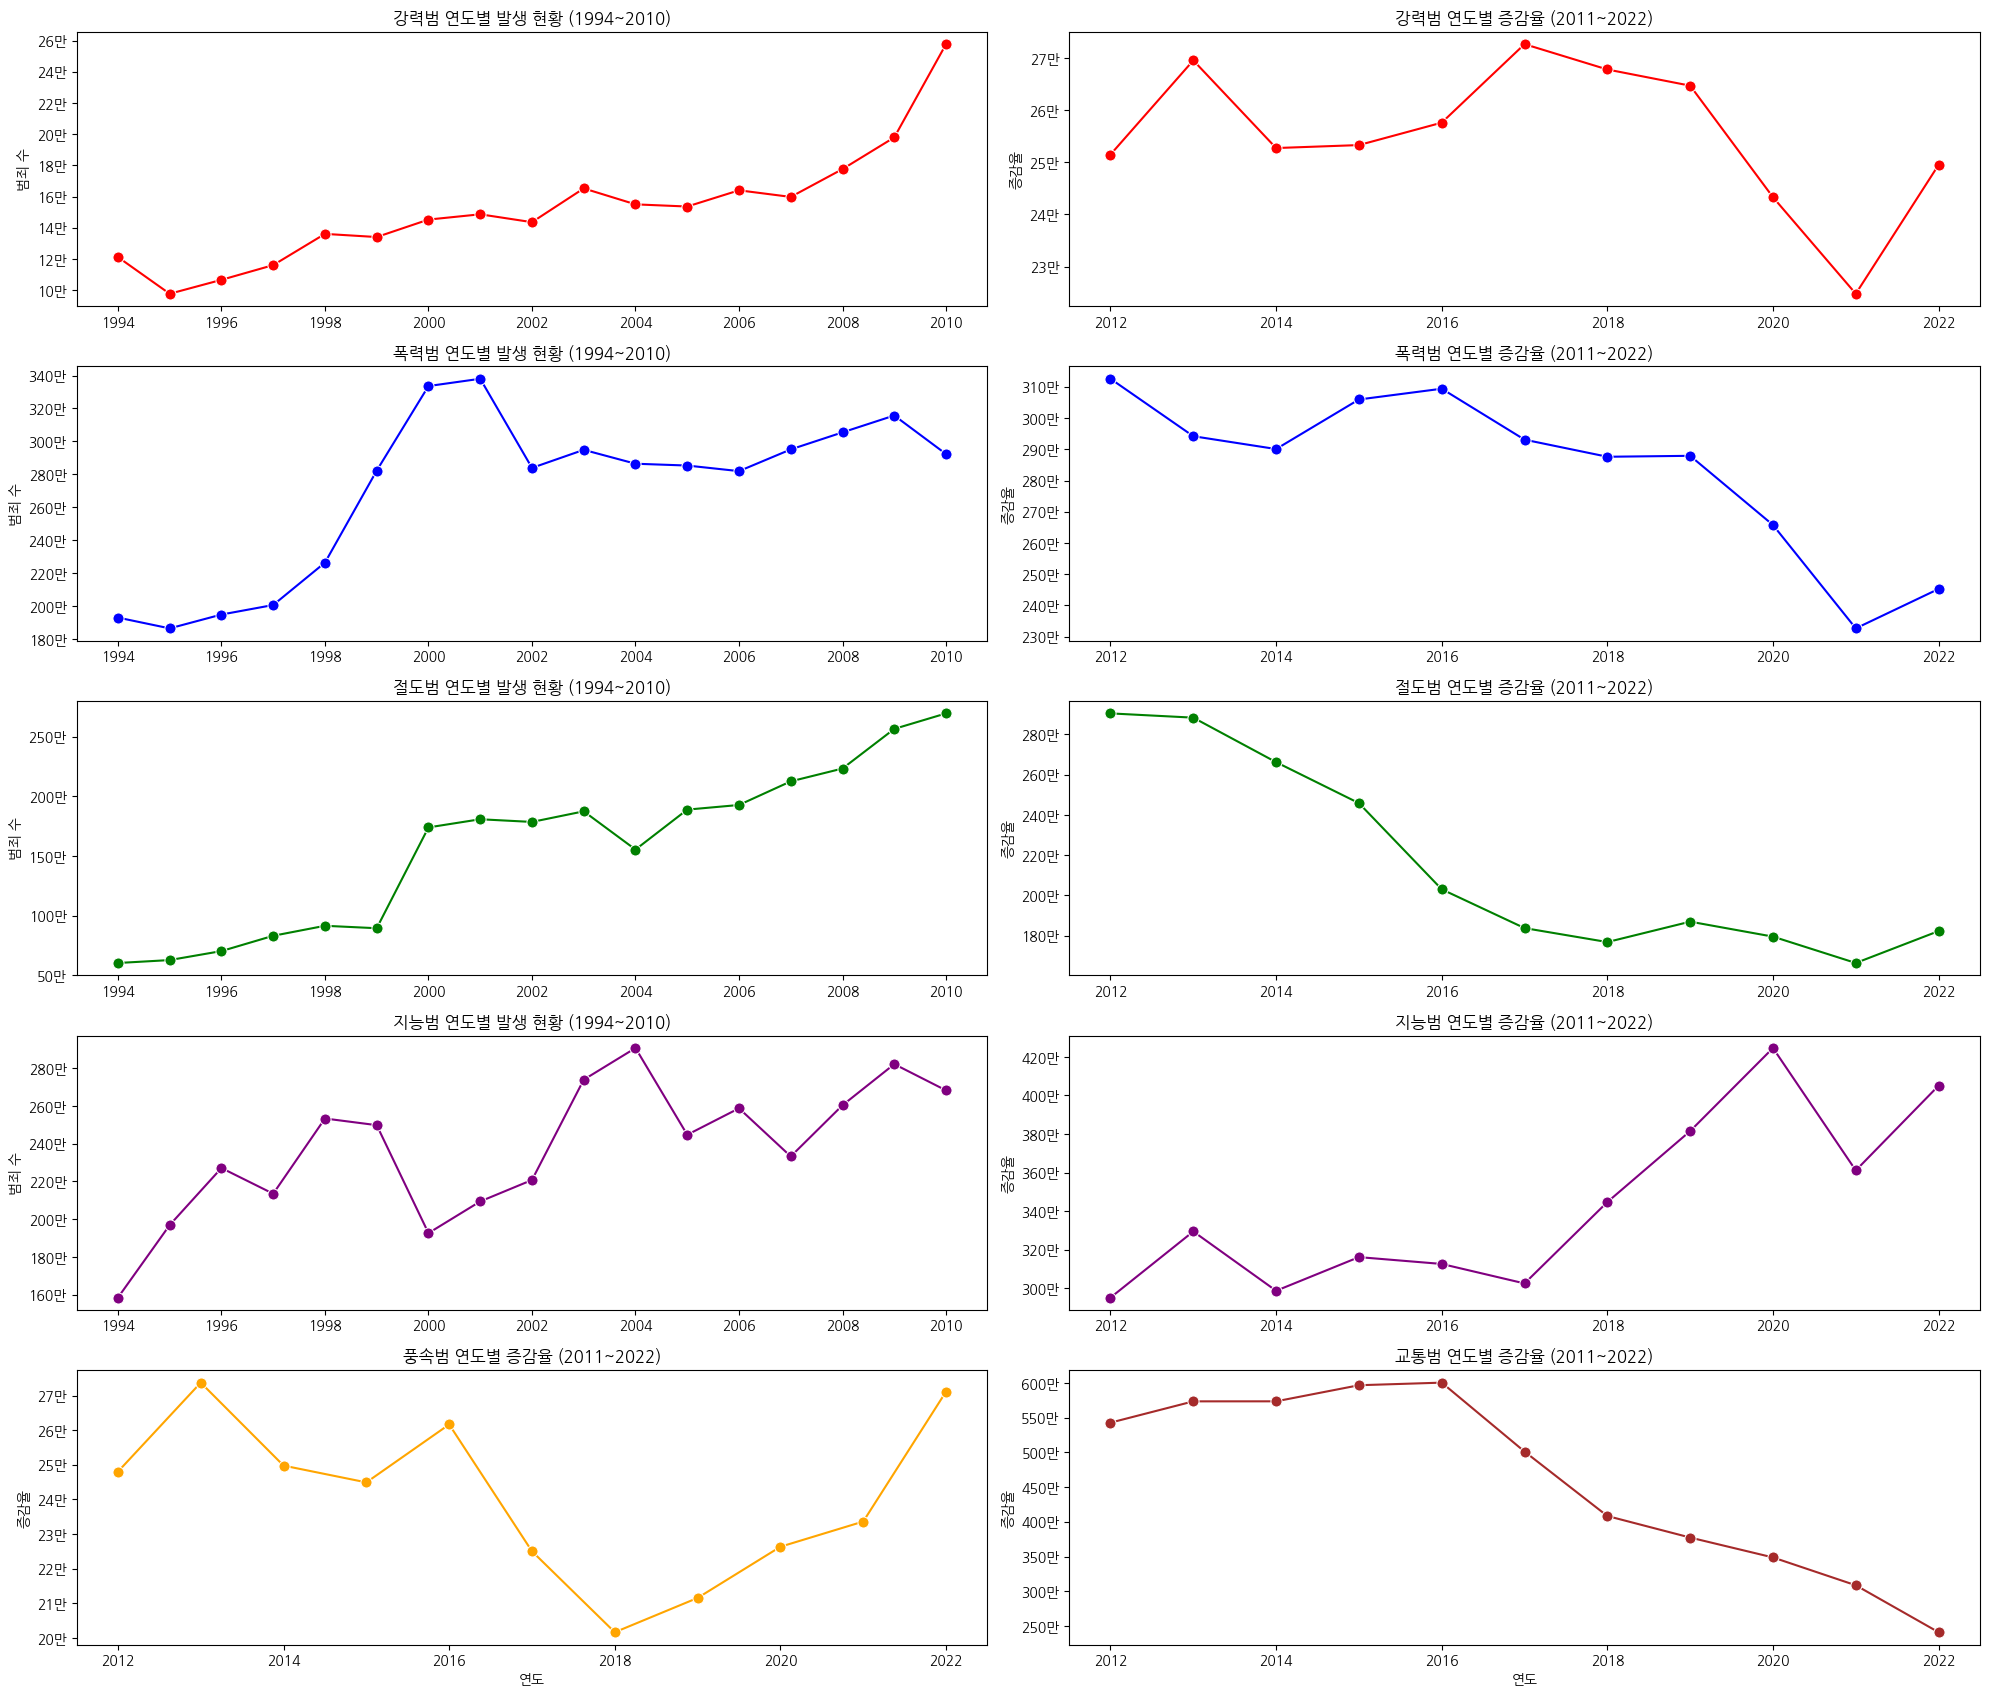

In [82]:
colors = {
    '강력범': 'r',
    '절도범': 'g',
    '폭력범': 'b',
    '지능범': 'purple',
    '풍속범': 'orange',
    '교통범': 'brown'
}
def millions_formatter(x, pos):
    return "{:,.0f}만".format(x // 1000)

# 그래프 크기 설정
plt.figure(figsize=(20, 20))

# 각 범죄 유형에 대한 발생 현황 (cate10)
plt.subplot(6, 2, 1)
sns.lineplot(x='연도', y='강력범', data=cate10, marker='o', color=colors['강력범'], markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황 (1994~2010)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 5)
sns.lineplot(x='연도', y='절도범', data=cate10, marker='o', color=colors['절도범'], markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황 (1994~2010)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 3)
sns.lineplot(x='연도', y='폭력범', data=cate10, marker='o', color=colors['폭력범'], markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황 (1994~2010)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 7)
sns.lineplot(x='연도', y='지능범', data=cate10, marker='o', color=colors['지능범'], markersize=8)
plt.xlabel('')
plt.ylabel('범죄 수')
plt.title('지능범 연도별 발생 현황 (1994~2010)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# 각 범죄 유형에 대한 증감율 (cate22)
plt.subplot(6, 2, 2)
sns.lineplot(x='연도', y='강력범', data=cate22, marker='o', color=colors['강력범'], markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('강력범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 6)
sns.lineplot(x='연도', y='절도범', data=cate22, marker='o', color=colors['절도범'], markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('절도범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 4)
sns.lineplot(x='연도', y='폭력범', data=cate22, marker='o', color=colors['폭력범'], markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('폭력범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 8)
sns.lineplot(x='연도', y='지능범', data=cate22, marker='o', color=colors['지능범'], markersize=8)
plt.xlabel('')
plt.ylabel('증감율')
plt.title('지능범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 9)
sns.lineplot(x='연도', y='풍속범', data=cate22, marker='o', color=colors['풍속범'], markersize=8)
plt.xlabel('연도')
plt.ylabel('증감율')
plt.title('풍속범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.subplot(6, 2, 10)
sns.lineplot(x='연도', y='교통범', data=cate22, marker='o', color=colors['교통범'], markersize=8)
plt.xlabel('연도')
plt.ylabel('증감율')
plt.title('교통범 연도별 증감율 (2011~2022)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

### 1. 분석 방향 [94~10]  
1. 절도범 범죄비율 및 발생 횟수 동일하게 증가 -> 분석    
2. 99년 기점으로 절도 및 폭력 범죄 비율에 따른 횟수도 증가 -> 분석   
3. 99년을 기점으로 지능범의 범죄 비율은 낮아졌으나 횟수는 전체적으로 증가 -> 분석    
4. 강력범 년도별 범죄 비율 편차는 미미하나 횟수 자체는 증가 -> 분석      
5. 지능범 2009(+-1년)년 급증한 기준 분석    
--------------------------------------------------------------- 



### 2. 분석 방향 [11~22]  
1. 교통범: 2016년도 기점으로 발생 횟수 및 비율이 동시에 급격하게 감소한 이유 분석    
2. 지능범: 비율은 증가 추세이며 2017년도를 기점으로 발생 횟수가 급격하게 증가한 이유    
3. 절도범: 비율 변화 조금씩 줄어드는 추세이나 발생 횟수 자체는 급격하게 감소하는 이유   
4. 강력범 & 폭력범: 2019~2021년까지 발생 횟수가 급격하게 감소한 이유 및 2021~2022년 사이 발생 횟수가 다시 급격하게 상승한 이유

## 유형별 성장률 데이터 보여주기

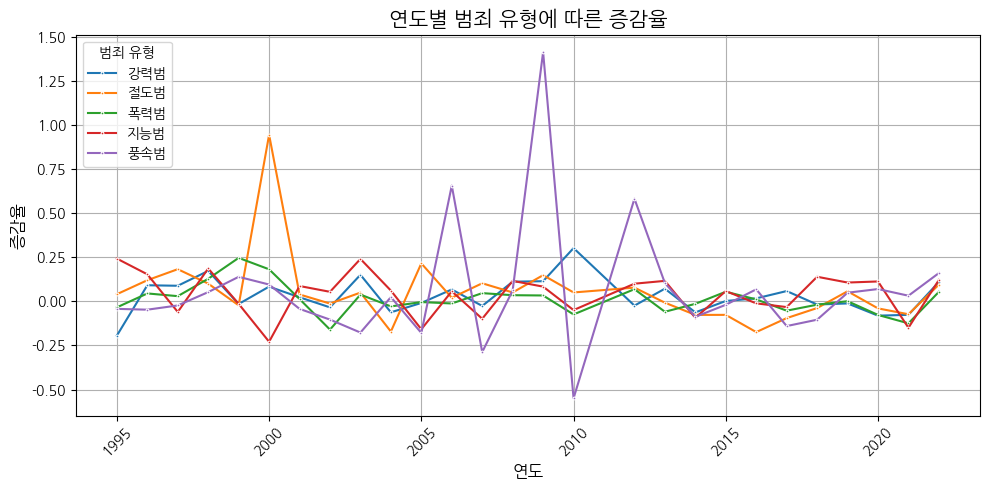

In [56]:
total_cate_growth = total_cate.set_index('연도').pct_change().reset_index()

# Melting the data for easier plotting with seaborn
total_cate_growth_melted = total_cate_growth.melt(id_vars='연도', var_name='범죄 유형', value_name='증감율')

# Plotting
plt.figure(figsize=(10,  5))
sns.lineplot(x='연도', y='증감율', hue='범죄 유형', data=total_cate_growth_melted, marker='o', markersize=2)

plt.title('연도별 범죄 유형에 따른 증감율', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('증감율', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.legend(title='범죄 유형', loc='upper left')
plt.tight_layout()
plt.show()

조금더 잘볼수있는방법..

In [57]:
# 5개의 토탈값 구하기
total_cate_sum = total_cate[['연도', '강력범', '절도범', '폭력범', '지능범', '풍속범']].groupby('연도').sum().reset_index()
total_cate_sum['5total'] = total_cate_sum[['강력범', '절도범', '폭력범', '지능범', '풍속범']].sum(axis=1)
print(total_cate_sum)


      연도    강력범     절도범     폭력범     지능범    풍속범  5total
0   1994  12114   60255  193047  158399  16515  440330
1   1995   9762   62710  186490  196845  15815  471622
2   1996  10655   70238  194891  227064  15070  517918
3   1997  11599   83063  200675  213445  14722  523504
4   1998  13602   91438  226409  253297  15497  600243
5   1999  13400   89395  282274  249769  17655  652493
6   2000  14520  173876  333630  192574  19342  733942
7   2001  14858  180704  338045  209364  18519  761490
8   2002  14353  178457  283930  220719  16605  714064
9   2003  16519  187352  294893  273867  13668  786299
10  2004  15496  155311  286464  290643  13998  761912
11  2005  15357  188780  285363  244680  11492  745672
12  2006  16397  192670  281969  258705  19040  768781
13  2007  15973  212458  295156  233213  13563  770363
14  2008  17758  223216  305508  260327  14411  821220
15  2009  19790  256423  315747  282106  34793  908859
16  2010  25771  269410  292347  268191  15673  871392
17  2012  

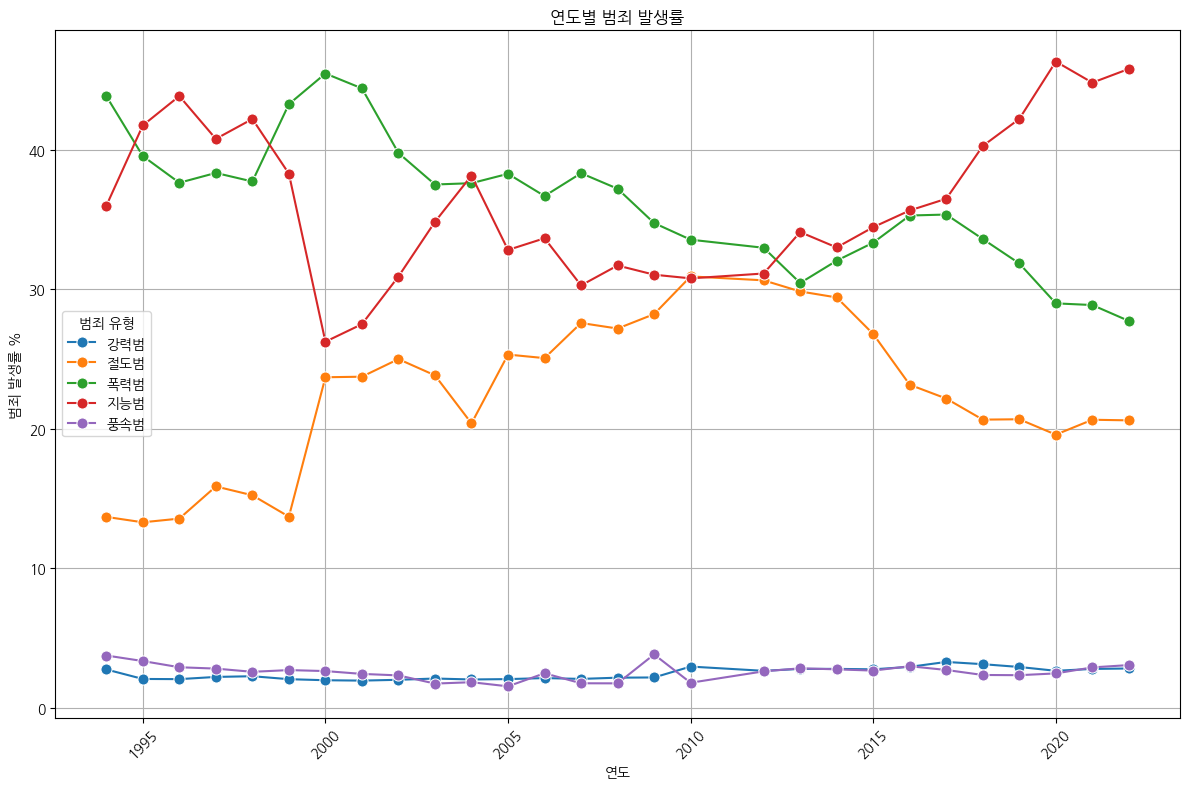

In [58]:
total_yearly = total.groupby('연도')['범죄 총 건수'].sum().reset_index()
total_yearly.columns = ['연도', 'total']
total_cate2 = pd.merge(total_cate_sum, total_yearly, on='연도')

crime_categories = ['강력범', '절도범', '폭력범', '지능범', '풍속범']
for category in crime_categories:
    total_cate2[f'{category}_발생률'] = total_cate2[category] / total_cate2['5total'] * 100

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Plot each crime category's crime rate over the years
sns.lineplot(x='연도', y='강력범_발생률', data=total_cate2, marker='o', markersize=8, label='강력범')
sns.lineplot(x='연도', y='절도범_발생률', data=total_cate2, marker='o', markersize=8, label='절도범')
sns.lineplot(x='연도', y='폭력범_발생률', data=total_cate2, marker='o', markersize=8, label='폭력범')
sns.lineplot(x='연도', y='지능범_발생률', data=total_cate2, marker='o', markersize=8, label='지능범')
sns.lineplot(x='연도', y='풍속범_발생률', data=total_cate2, marker='o', markersize=8, label='풍속범')

# Customize labels and title
plt.xlabel('연도')
plt.ylabel('범죄 발생률 %')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


In [22]:
total_cate2
# 5범죄 비율이랑 전체 범죄발생수의 사이도 볼수있다.

,연도,강력범,절도범,폭력범,지능범,풍속범,5total,total,강력범_발생률,절도범_발생률,폭력범_발생률,지능범_발생률,풍속범_발생률
0,1994,12114,60255,193047,158399,16515,440330,1309326,2.751118,13.684055,43.841437,35.972793,3.750596
1,1995,9762,62710,186490,196845,15815,471622,1329694,2.069878,13.296666,39.542261,41.737875,3.353321
2,1996,10655,70238,194891,227064,15070,517918,1419811,2.057275,13.561606,37.629702,43.841689,2.909727
3,1997,11599,83063,200675,213445,14722,523504,1536652,2.215647,15.866736,38.333040,40.772372,2.812204
4,1998,13602,91438,226409,253297,15497,600243,1712233,2.266082,15.233497,37.719557,42.199076,2.581788
5,1999,13400,89395,282274,249769,17655,652493,1654064,2.053662,13.700530,43.260847,38.279185,2.705776
6,2000,14520,173876,333630,192574,19342,733942,1739558,1.978358,23.690700,45.457270,26.238313,2.635358
7,2001,14858,180704,338045,209364,18519,761490,1860687,1.951175,23.730318,44.392572,27.493992,2.431943
8,2002,14353,178457,283930,220719,16605,714064,1833271,2.010044,24.991737,39.762542,30.910255,2.325422
9,2003,16519,187352,294893,273867,13668,786299,1894762,2.100855,23.827068,37.503927,34.829880,1.738270


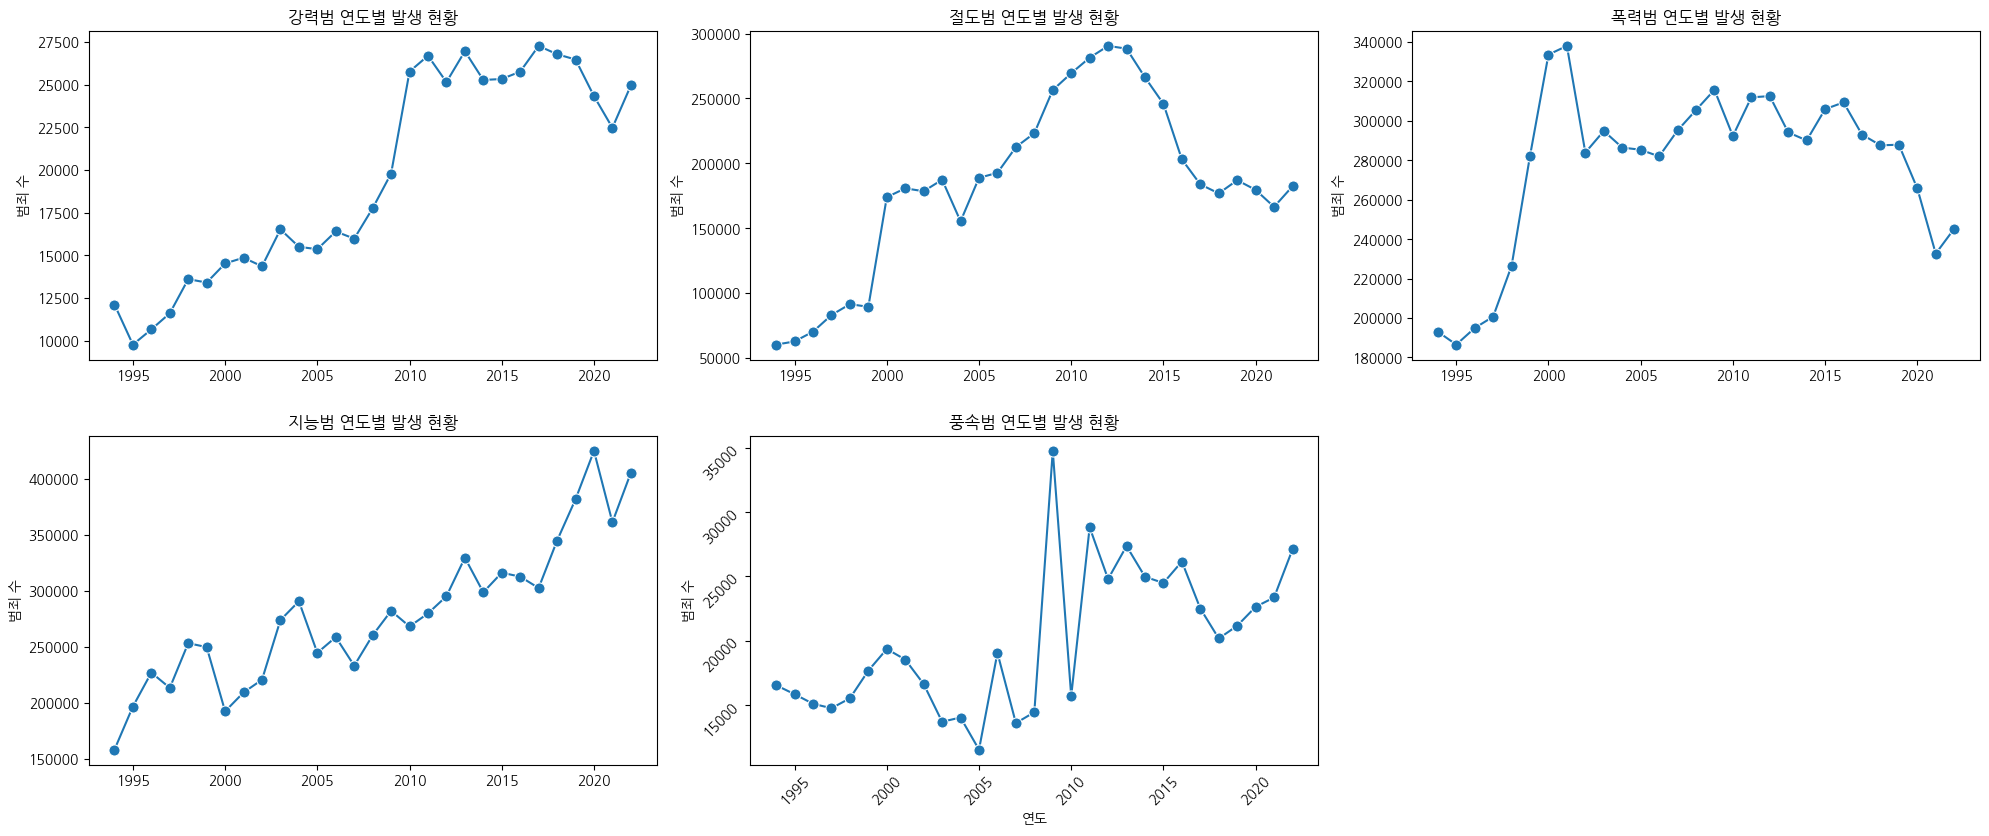

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# subplot 1
plt.subplot(5, 3, 1)
sns.lineplot(x='연도', y='강력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('강력범 연도별 발생 현황')

# subplot 2
plt.subplot(5, 3, 2)
sns.lineplot(x='연도', y='절도범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('절도범 연도별 발생 현황')

# subplot 3
plt.subplot(5, 3, 3)
sns.lineplot(x='연도', y='폭력범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('폭력범 연도별 발생 현황')

# subplot 4
plt.subplot(5, 3, 4)
sns.lineplot(x='연도', y='지능범', data=total_cate, marker='o', markersize=8)
plt.xlabel('')  # x축 라벨 비움
plt.ylabel('범죄 수')
plt.title('지능범 연도별 발생 현황')

# subplot 5
plt.subplot(5, 3, 5)
sns.lineplot(x='연도', y='풍속범', data=total_cate, marker='o', markersize=8)
plt.xlabel('연도')  # x축 라벨 추가
plt.ylabel('범죄 수')
plt.title('풍속범 연도별 발생 현황')

# 축 라벨 회전
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()


In [24]:
crime_data_df1 = cate10.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')
crime_data_df2 = cate22.melt(id_vars=['연도'], var_name='범죄 유형', value_name='범죄 수')

In [25]:
crime_data_df1

,연도,범죄 유형,범죄 수
0,1994,강력범,12114
1,1995,강력범,9762
2,1996,강력범,10655
3,1997,강력범,11599
4,1998,강력범,13602
...,...,...,...
80,2006,풍속범,19040
81,2007,풍속범,13563
82,2008,풍속범,14411
83,2009,풍속범,34793


## 종합적인 그래프 보여주기

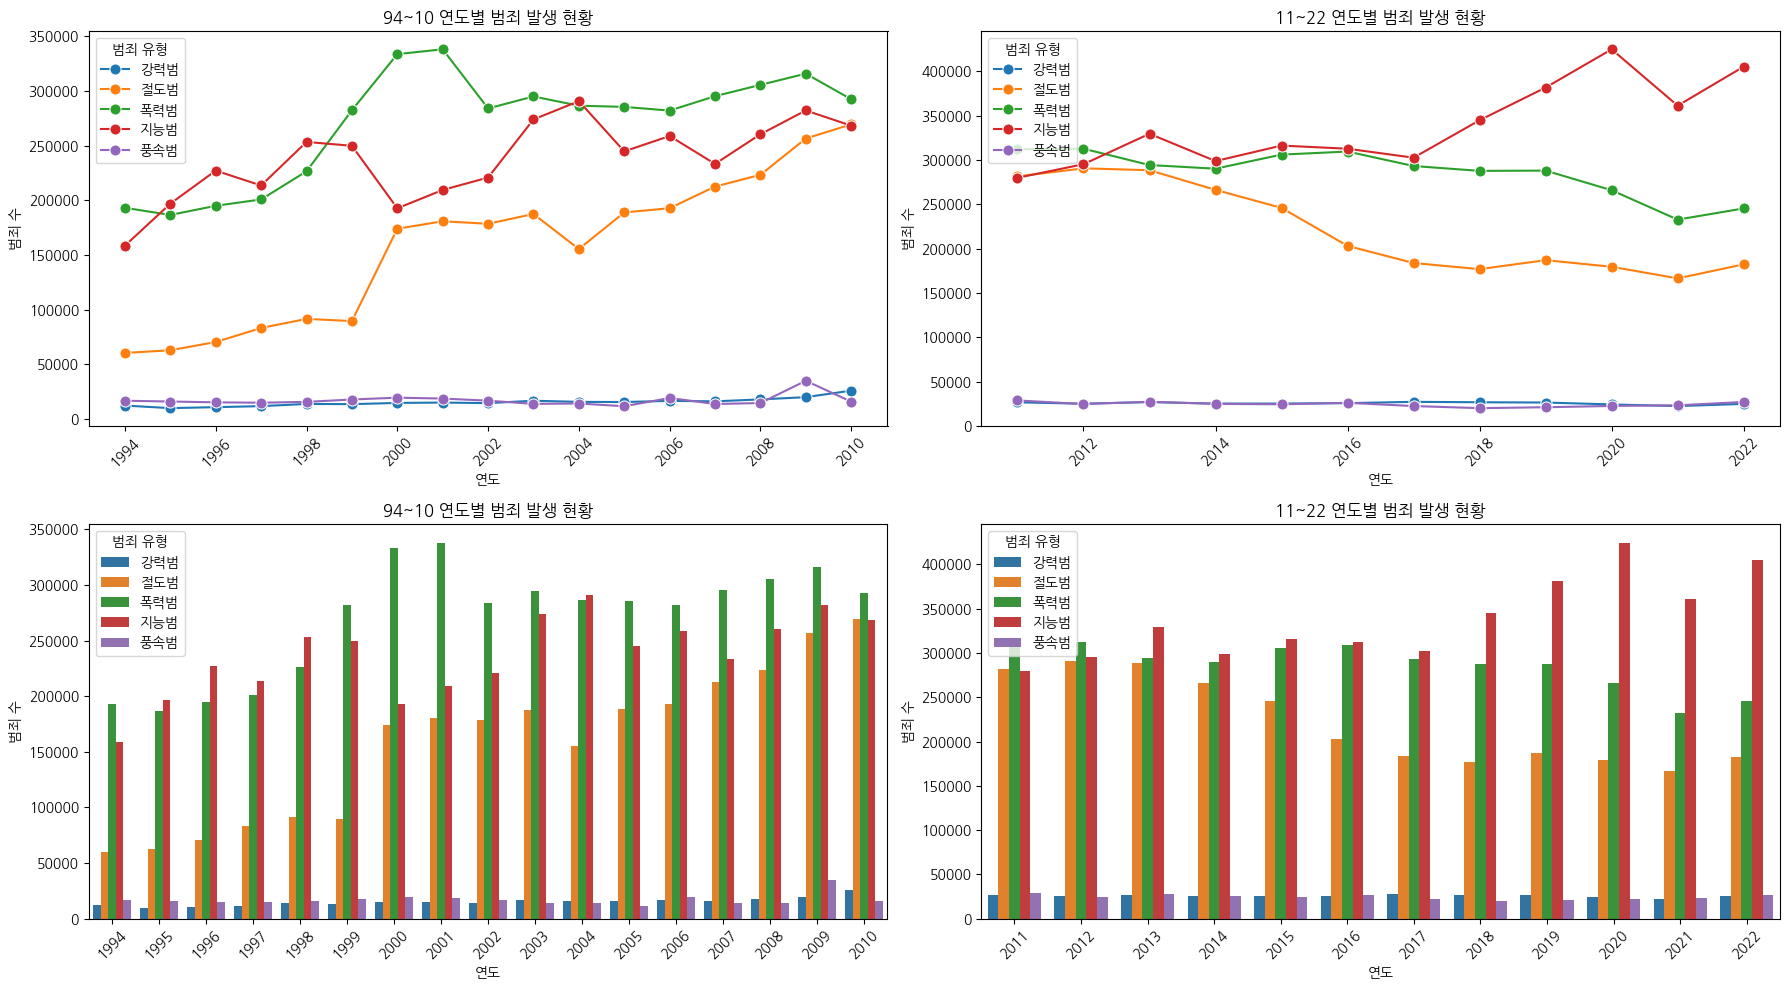

In [26]:
# 그래프 그리기
plt.figure(figsize=(18, 10))

# cate10 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 1)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate22 데이터프레임에 대한 lineplot
plt.subplot(2, 2, 2)
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')


# cate10 데이터프레임에 대한 barplot
plt.subplot(2, 2, 3)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('94~10 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

# cate22 데이터프레임에 대한 barplot
plt.subplot(2, 2, 4)
sns.barplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2)
plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('11~22 연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='범죄 유형', loc='upper left')

plt.tight_layout()
plt.show()


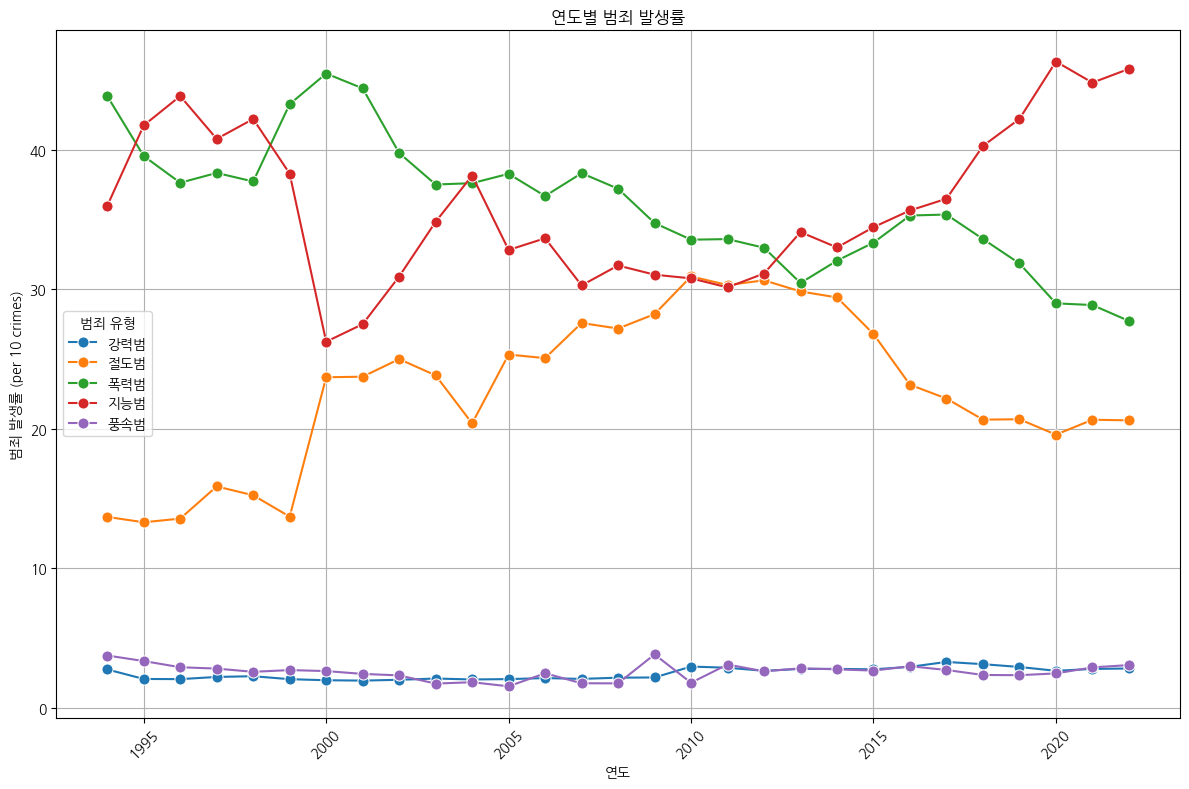

In [27]:
plt.figure(figsize=(12, 8))

# Plot each crime category's crime rate over the years
sns.lineplot(x='연도', y='강력범_발생률', data=total_cate2, marker='o', markersize=8, label='강력범')
sns.lineplot(x='연도', y='절도범_발생률', data=total_cate2, marker='o', markersize=8, label='절도범')
sns.lineplot(x='연도', y='폭력범_발생률', data=total_cate2, marker='o', markersize=8, label='폭력범')
sns.lineplot(x='연도', y='지능범_발생률', data=total_cate2, marker='o', markersize=8, label='지능범')
sns.lineplot(x='연도', y='풍속범_발생률', data=total_cate2, marker='o', markersize=8, label='풍속범')

# Customize labels and title
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()

In [28]:
total_cate2

,연도,강력범,절도범,폭력범,지능범,풍속범,5total,total,강력범_발생률,절도범_발생률,폭력범_발생률,지능범_발생률,풍속범_발생률
0,1994,12114,60255,193047,158399,16515,440330,1309326,2.751118,13.684055,43.841437,35.972793,3.750596
1,1995,9762,62710,186490,196845,15815,471622,1329694,2.069878,13.296666,39.542261,41.737875,3.353321
2,1996,10655,70238,194891,227064,15070,517918,1419811,2.057275,13.561606,37.629702,43.841689,2.909727
3,1997,11599,83063,200675,213445,14722,523504,1536652,2.215647,15.866736,38.333040,40.772372,2.812204
4,1998,13602,91438,226409,253297,15497,600243,1712233,2.266082,15.233497,37.719557,42.199076,2.581788
5,1999,13400,89395,282274,249769,17655,652493,1654064,2.053662,13.700530,43.260847,38.279185,2.705776
6,2000,14520,173876,333630,192574,19342,733942,1739558,1.978358,23.690700,45.457270,26.238313,2.635358
7,2001,14858,180704,338045,209364,18519,761490,1860687,1.951175,23.730318,44.392572,27.493992,2.431943
8,2002,14353,178457,283930,220719,16605,714064,1833271,2.010044,24.991737,39.762542,30.910255,2.325422
9,2003,16519,187352,294893,273867,13668,786299,1894762,2.100855,23.827068,37.503927,34.829880,1.738270


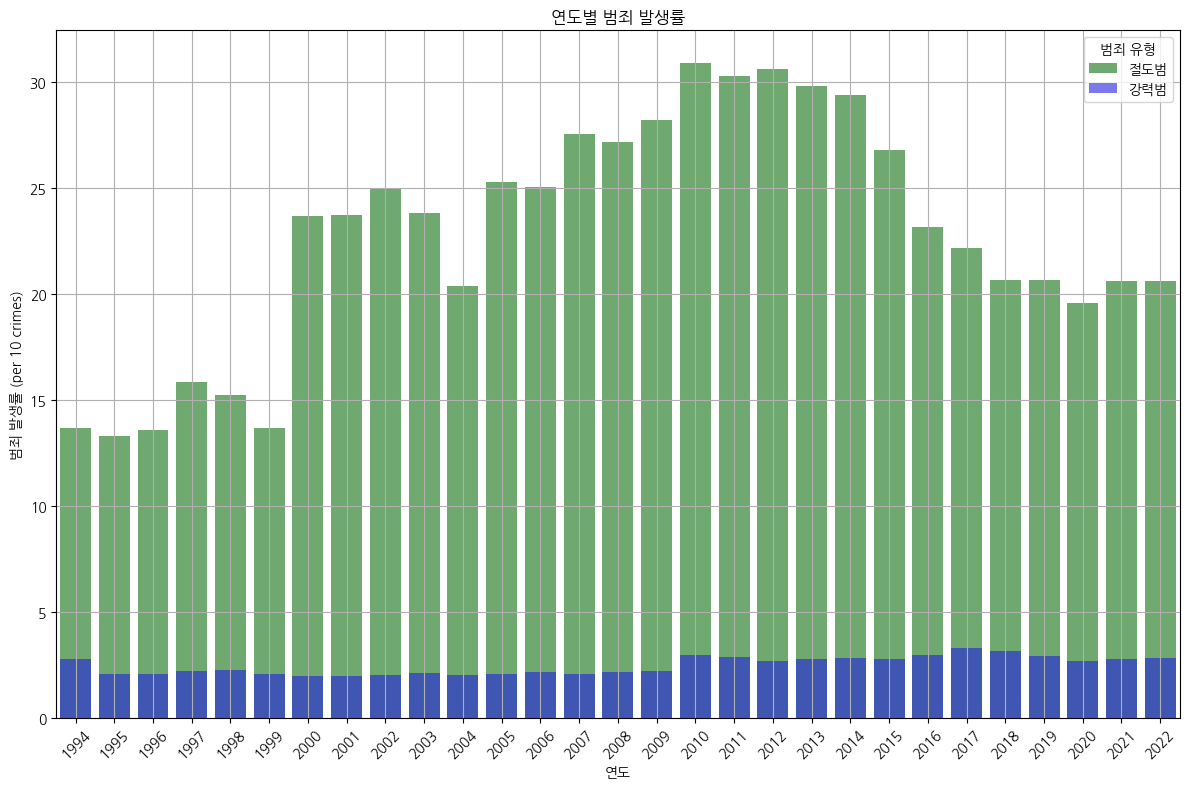

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x='연도', y='절도범_발생률', data=total_cate2, color='g', alpha=0.6, label='절도범')
sns.barplot(x='연도', y='강력범_발생률', data=total_cate2, color='b', alpha=0.6, label='강력범')
plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


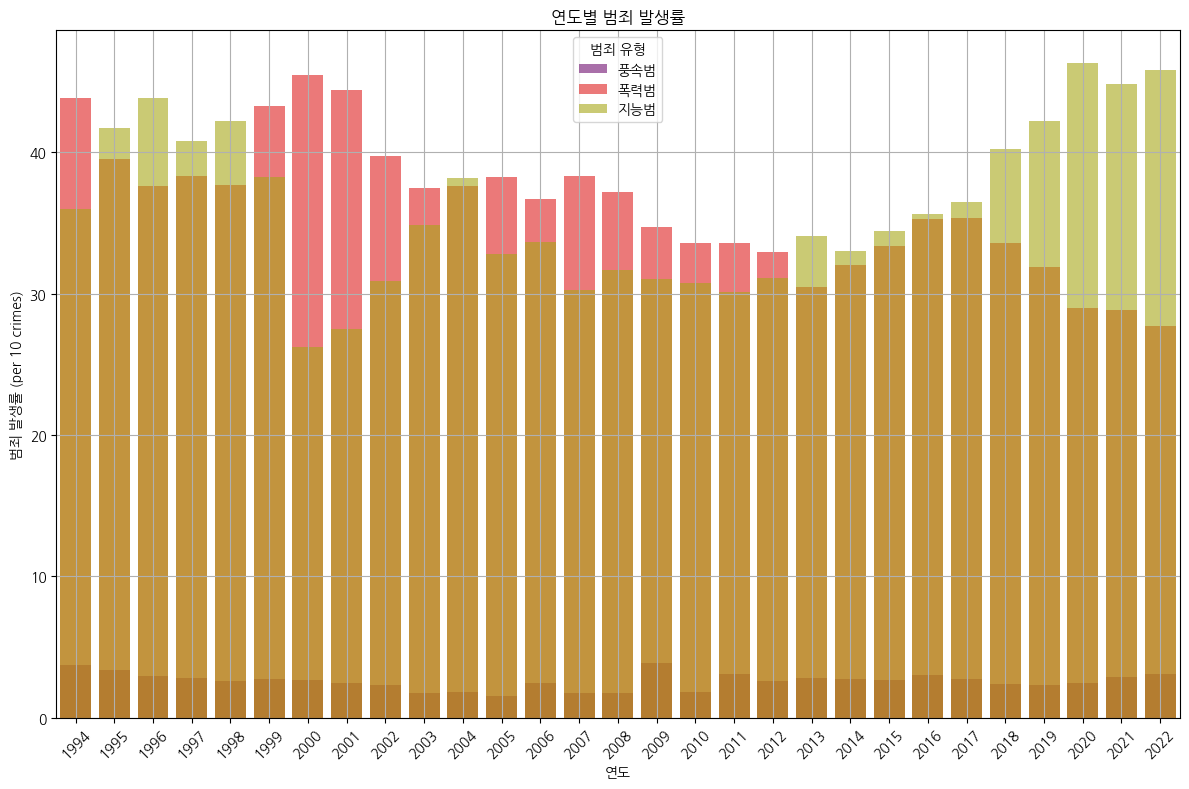

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))


sns.barplot(x='연도', y='풍속범_발생률', data=total_cate2, color='purple', alpha=0.6, label='풍속범')
sns.barplot(x='연도', y='폭력범_발생률', data=total_cate2, color='r', alpha=0.6, label='폭력범')
sns.barplot(x='연도', y='지능범_발생률', data=total_cate2, color='y', alpha=0.6, label='지능범')

plt.xlabel('연도')
plt.ylabel('범죄 발생률 (per 10 crimes)')
plt.title('연도별 범죄 발생률')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='범죄 유형')

# Show plot
plt.tight_layout()
plt.show()


### 라인그래프 합쳐서 보여주기

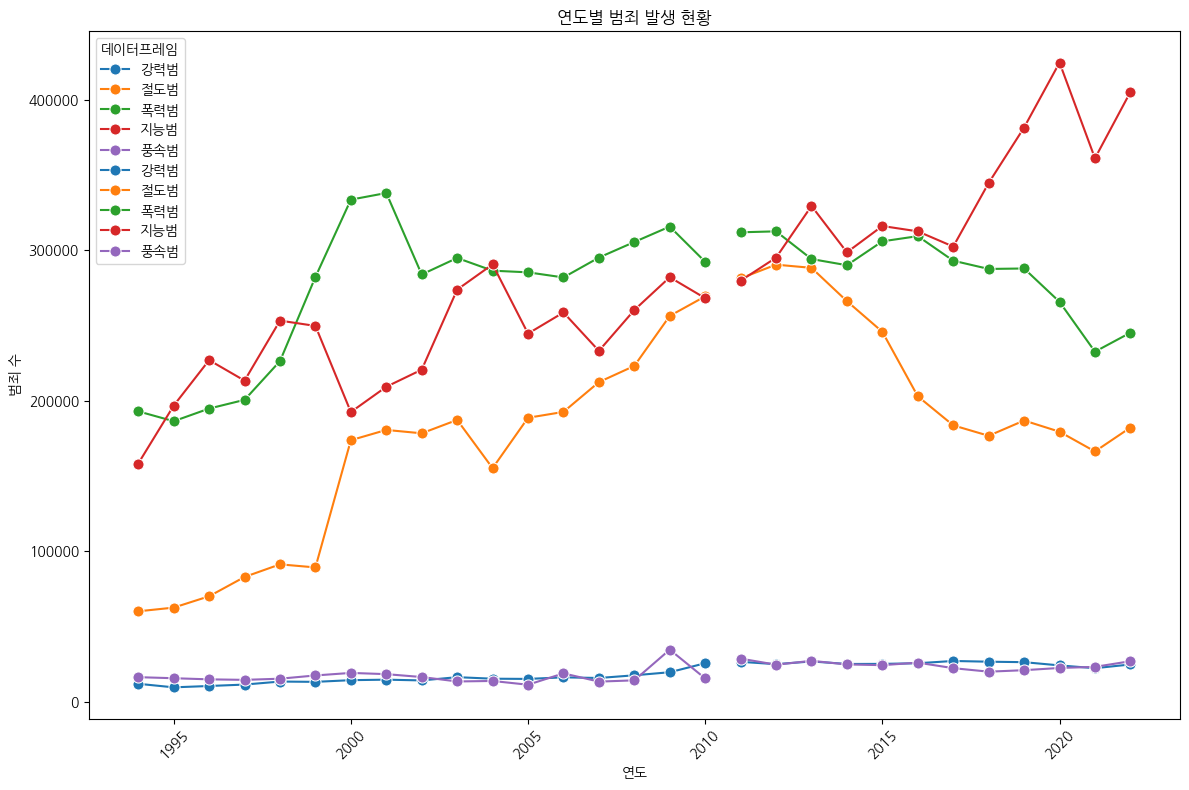

In [31]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# cate10 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df1, marker='o', markersize=8)

# cate22 데이터프레임에 대한 lineplot
sns.lineplot(x='연도', y='범죄 수', hue='범죄 유형', data=crime_data_df2, marker='o', markersize=8)

plt.xlabel('연도')
plt.ylabel('범죄 수')
plt.title('연도별 범죄 발생 현황')
plt.xticks(rotation=45)
plt.legend(title='데이터프레임', loc='upper left')

plt.tight_layout()
plt.show();